# Introduction to Music2leadsheet


# Setup Library

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from librosa.effects import harmonic
from collections import Counter
from music21 import note , duration , environment

# Setup Environment

In [2]:
us = environment.UserSettings()
us['musicxmlPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['musescoreDirectPNGPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['lilypondPath'] = r'C://Music2leadsheet//lilypond-2.24.3//bin//lilypond.exe'

# Separate vocals
* แยกเสียงร้องออกจากเพลง

In [4]:
filename = input().replace("\\" , "/")
print(filename)
os.system(f"demucs -d cpu {filename}")

C:/Music2leadsheet/TEST.wav


0

# Notes
* อ่านไฟล์เสียง
* เอาเสียงร้องที่มาแยกเป็นแปลเป็น Note โดย ใช้ความยาวของเสียงจุดเริ่มต้นของเสียงร้องถึงจุดสิ้นสุดเสียงเป็น 1 โน๊ต
* ต้องการเอาเสียงของโน๊ต(pitch) โดยเอาช่วงเวลามาทำของแต่ละโน๊ตมาทำ Fourier analysis โดยใช้ Fast Fourier Transform (time domain to frequency domain)โดยเลือก frequency ที่มากที่สุดเพื่อไปพยากรณ์ว่าเป็นโน๊ตตัวใด

```python
data_structure = {
"Duration": float ,
"Note": string 
}
```

# Onset

Onset times: [  1.97369615   2.78639456   4.10993197   5.68888889   7.45360544
   8.38240363   8.89324263   9.52018141   9.68272109   9.96136054
  10.17034014  10.42575964  11.4706576   12.53877551  12.67809524
  13.58367347  14.14095238  14.39637188  14.65179138  18.85460317
  18.92426304  19.15646259  19.27256236  19.41188209  19.78340136
  19.92272109  20.2245805   20.57287982  21.43201814  22.03573696
  22.66267574  22.77877551  22.84843537  23.05741497  23.35927438
  23.63791383  23.84689342  24.05587302  24.40417234  24.54349206
  24.70603175  25.21687075  25.44907029  26.2153288   26.7261678
  27.07446712  27.21378685  27.32988662  27.56208617  27.86394558
  28.37478458  28.4676644   28.63020408  29.14104308  29.39646259
  29.698322    29.93052154  30.02340136  30.67356009  31.25405896
  31.53269841  31.76489796  32.06675737  32.34539683  32.60081633
  33.13487528  33.9475737   34.2029932   35.24789116  35.45687075
  36.54820862  37.01260771  37.29124717  38.40580499  38.6147845

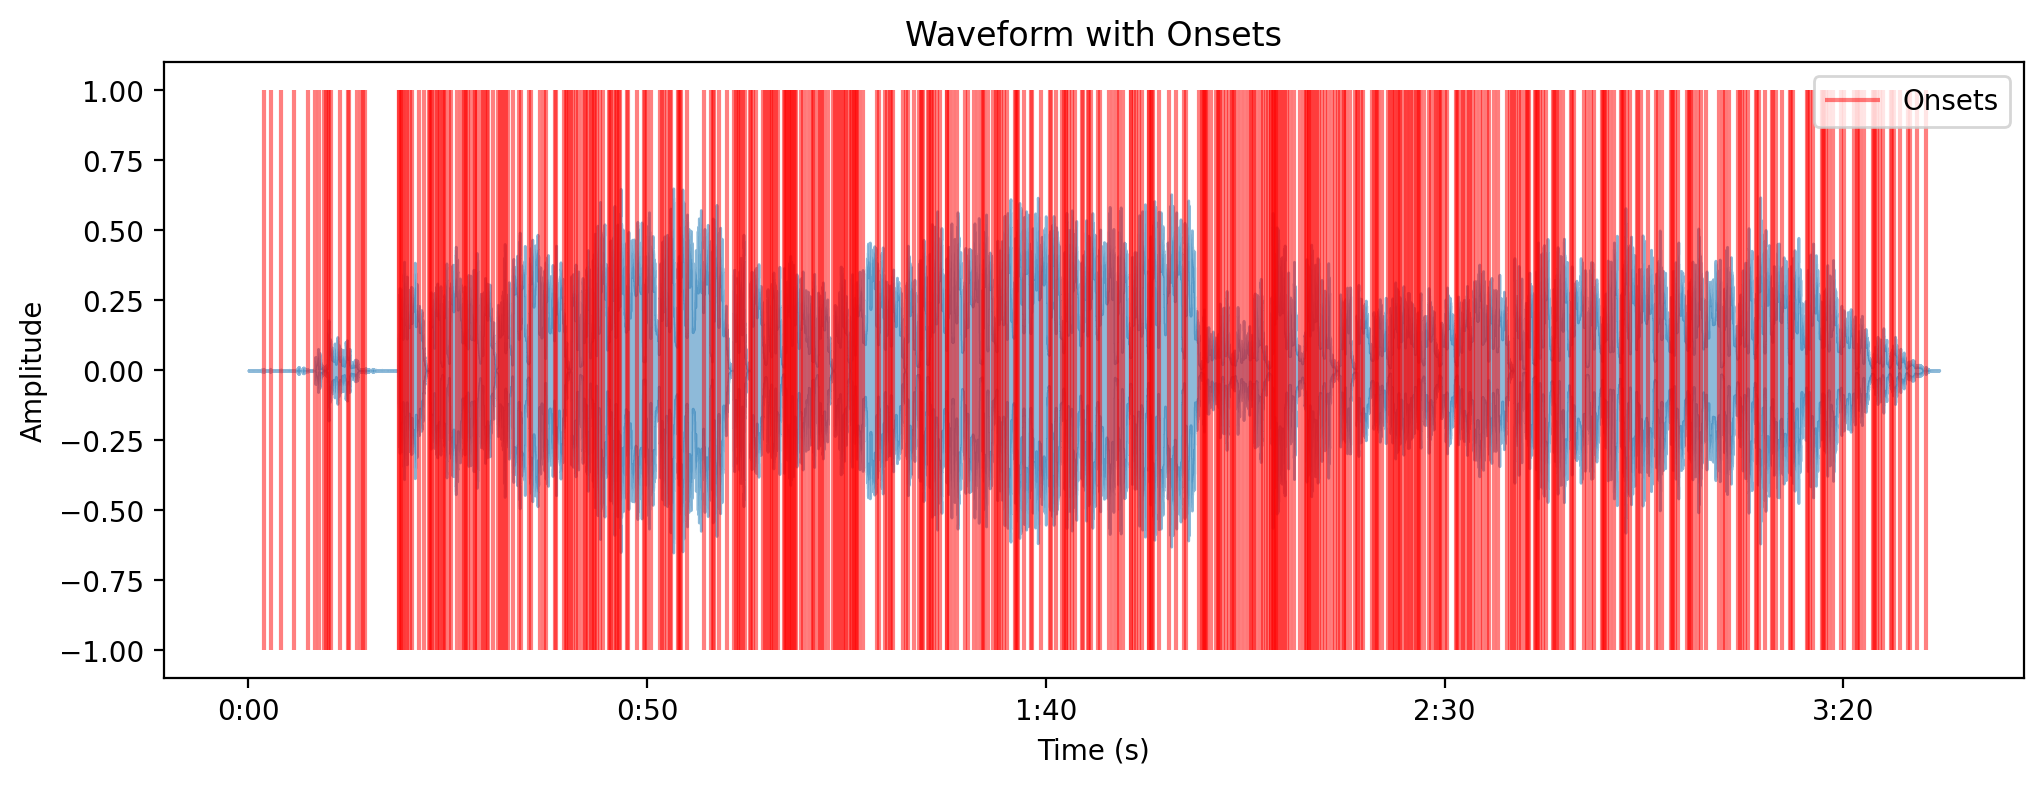

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_path = r'C:\Music2leadsheet\separated\htdemucs\TEST\vocals.wav'
y, sr = librosa.load(audio_path)

# Extract onset events
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

# Convert frames to time
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Print the onset times
print("Onset times:", onset_times)

# Plot the waveform and overlay onset events
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.vlines(onset_times, -1, 1, color='r', alpha=0.5, label='Onsets')
plt.title('Waveform with Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


c:\Users\Tanap\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=34
  warnings.warn(
c:\Users\Tanap\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=58
  warnings.warn(
c:\Users\Tanap\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=68
  warnings.warn(
c:\Users\Tanap\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=76
  warnings.warn(
c:\Users\Tanap\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=40
  warnings.warn(
c:\Users\Tanap\AppData\Local\Programs\Python\Python310\lib\site-p

Maximum frequency in onset interval 1: 0.0 Hz
Maximum frequency in onset interval 2: 0.0 Hz
Maximum frequency in onset interval 3: 0.0 Hz
Maximum frequency in onset interval 4: 0.0 Hz
Maximum frequency in onset interval 5: 0.0 Hz
Maximum frequency in onset interval 6: 4435.83984375 Hz
Maximum frequency in onset interval 7: 0.0 Hz
Maximum frequency in onset interval 8: 0.0 Hz
Maximum frequency in onset interval 9: 0.0 Hz
Maximum frequency in onset interval 10: 0.0 Hz
Maximum frequency in onset interval 11: 0.0 Hz
Maximum frequency in onset interval 12: 0.0 Hz
Maximum frequency in onset interval 13: 0.0 Hz
Maximum frequency in onset interval 14: 0.0 Hz
Maximum frequency in onset interval 15: 0.0 Hz
Maximum frequency in onset interval 16: 0.0 Hz
Maximum frequency in onset interval 17: 0.0 Hz
Maximum frequency in onset interval 18: 0.0 Hz
Maximum frequency in onset interval 19: 0.0 Hz
Maximum frequency in onset interval 20: 2960.8154296875 Hz
Maximum frequency in onset interval 21: 0.0 Hz


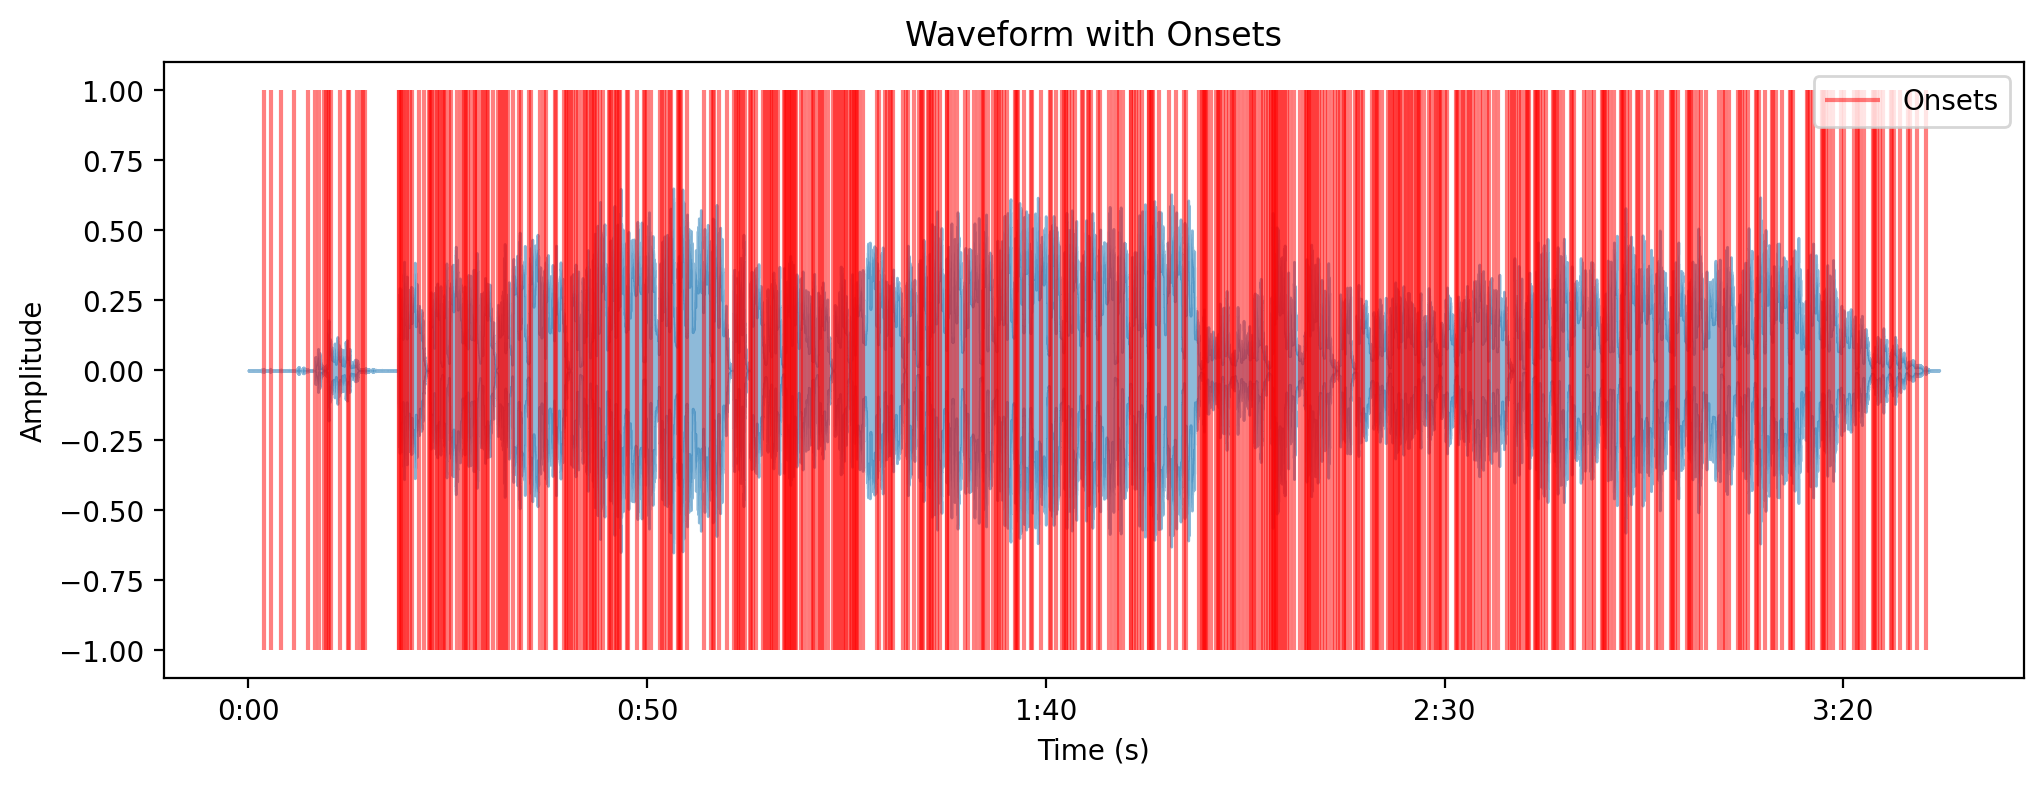

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = r'C:\Music2leadsheet\separated\htdemucs\TEST\vocals.wav'
y, sr = librosa.load(audio_path)

# Extract onset events
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

# Convert frames to time
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Find maximum frequency within each onset interval
for i in range(len(onset_times)-1):
    onset_start = int(librosa.time_to_frames(onset_times[i], sr=sr))
    onset_end = int(librosa.time_to_frames(onset_times[i+1], sr=sr))

    # Extract frequency content within the current onset interval
    onset_interval = y[onset_start:onset_end]

    # Compute the power spectrum
    power_spectrum = np.abs(librosa.stft(onset_interval))

    # Find the frequency with maximum energy
    max_freq_index = np.argmax(np.sum(power_spectrum, axis=1))
    max_freq = librosa.fft_frequencies(sr=sr)[max_freq_index]

    print(f"Maximum frequency in onset interval {i+1}: {max_freq} Hz")

# Plot the waveform and overlay onset events
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.vlines(onset_times, -1, 1, color='r', alpha=0.5, label='Onsets')
plt.title('Waveform with Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

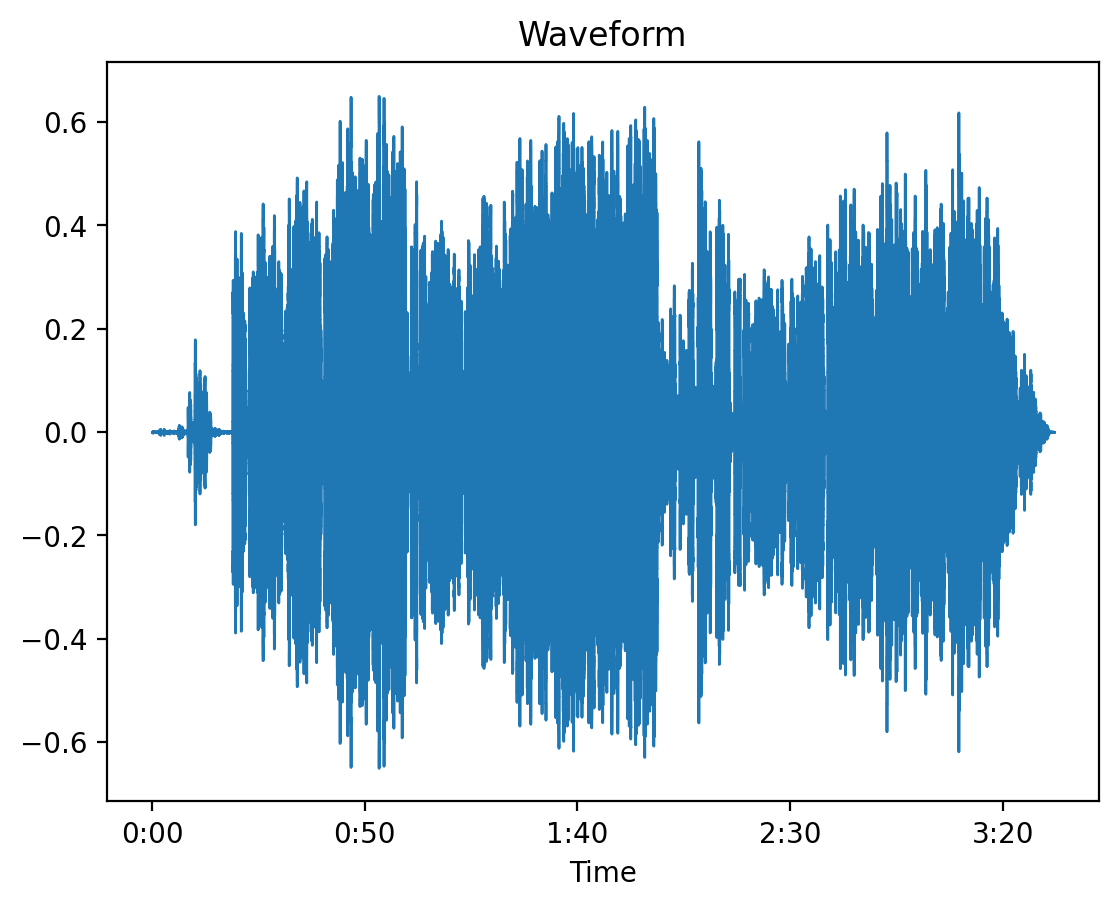

ValueError: zero-size array to reduction operation maximum which has no identity

NameError: name 'score' is not defined

# Fix Duration

In [75]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# อ่านไฟล์เสียง
file_path = "path/to/your/audio/file.mp3"
y, sr = librosa.load(file_path)

# แบ่งโน๊ตโดยใช้ onset
onsets = librosa.onset.onset_detect(y, sr=sr)

# เก็บข้อมูล pitch แต่ละโน๊ต
note_pitches = []

for i in range(len(onsets) - 1):
    onset_start = onsets[i]
    onset_end = onsets[i + 1]

    # ทำ FFT ของช่วงเวลาระหว่าง onset[i] ถึง onset[i+1]
    segment = y[onset_start:onset_end]
    fft_result = np.fft.fft(segment)
    fft_freqs = np.fft.fftfreq(len(fft_result), d=1/sr)

    # เลือก frequency ที่มากที่สุด
    max_freq_index = np.argmax(np.abs(fft_result))
    max_freq = fft_freqs[max_freq_index]

    # พยากรณ์โน๊ต
    nearest_note = min(note_frequencies, key=lambda x: abs(note_frequencies[x] - max_freq))
    note_pitches.append((onset_start, onset_end, nearest_note))

# แสดงผลลัพธ์
for pitch in note_pitches:
    print(f"Note: {pitch[2]}, Start: {pitch[0]}, End: {pitch[1]}")


[{'start_time': 1.7066666666666668, 'end_time': 1.9504761904761905, 'duration': 0.2438095238095237, 'note': 'A4'}, {'start_time': 1.9504761904761905, 'end_time': 2.4961451247165534, 'duration': 0.5456689342403629, 'note': 'A3'}, {'start_time': 2.4961451247165534, 'end_time': 2.75156462585034, 'duration': 0.25541950113378675, 'note': 'E4'}, {'start_time': 2.75156462585034, 'end_time': 3.01859410430839, 'duration': 0.26702947845805003, 'note': 'E4'}, {'start_time': 3.01859410430839, 'end_time': 3.297233560090703, 'duration': 0.27863945578231286, 'note': 'D#4'}, {'start_time': 3.297233560090703, 'end_time': 3.4249433106575964, 'duration': 0.12770975056689338, 'note': 'C#4'}, {'start_time': 3.4249433106575964, 'end_time': 3.5526530612244898, 'duration': 0.12770975056689338, 'note': 'A3'}, {'start_time': 3.5526530612244898, 'end_time': 3.81968253968254, 'duration': 0.26702947845805003, 'note': 'D#4'}, {'start_time': 3.81968253968254, 'end_time': 3.959002267573696, 'duration': 0.139319727891

# Generate a random

In [77]:
from music21 import note, stream, metadata, environment

# Function to convert note names to music21 Note objects
def create_note(note_name):
    return note.Note(note_name)

# Function to generate a music sheet using music21
def generate_music_sheet(data_structure, title= " Generated Music Sheet "):
    # Create an empty music21 Stream
    music_stream = stream.Stream()

    # Set title for the music sheet
    music_sheet_metadata = metadata.Metadata()
    music_sheet_metadata.title = title
    music_stream.insert(0, music_sheet_metadata)

    for segment in data_structure:
        # Extract duration and note information
        duration = segment['duration']
        note_name = segment['note']

        # Create a Note object based on the note name
        n = create_note(note_name)
        # Set the duration of the note
        n.duration.quarterLength = duration
        # Add the note to the music stream
        music_stream.append(n)

    return music_stream

# Generate music sheet with a title
sheet_title = "My Generated Music Sheet"  # Replace with your desired title
music_sheet = generate_music_sheet(data_structure, title=sheet_title)

# Show the music sheet with notes displayed
env = environment.Environment()
music_sheet.show()


MusicXMLExportException: In part (None), measure (1): Cannot convert inexpressible durations to MusicXML.

In [76]:
from music21 import note, stream, metadata, environment


# Function to generate a music sheet using music21
def generate_music_sheet(data_structure, title= " Generated Music Sheet "):
    # Create an empty music21 Stream
    music_stream = stream.Stream()

    # Set title for the music sheet
    music_sheet_metadata = metadata.Metadata()
    music_sheet_metadata.title = title
    music_stream.insert(0, music_sheet_metadata)

    for segment in data_structure:
        # Extract duration and note information
        duration = segment['duration']
        note_name = segment['note']
        print(round(duration,2) , " : " , note_name)
        # Create a Note object based on the note name
        n = note.Note(note_name, quarterLength = round(duration,1))
        # Add the note to the music stream
        music_stream.append(n)

    return music_stream

# Generate music sheet with a title
sheet_title = "My Generated Music Sheet"  # Replace with your desired title
music_sheet = generate_music_sheet(data_structure, title=sheet_title)

# Show the music sheet with notes displayed
music_sheet.show()


0.24  :  A4
0.55  :  A3
0.26  :  E4
0.27  :  E4
0.28  :  D#4
0.13  :  C#4
0.13  :  A3
0.27  :  D#4
0.14  :  F4
0.12  :  F4
0.53  :  A3
0.41  :  A4
0.12  :  A4
0.53  :  A3
0.15  :  G4
0.12  :  A4
0.13  :  F#4
0.13  :  F#4
0.27  :  F#4
0.27  :  E4
0.27  :  A4
0.52  :  G#4
0.13  :  F#4
0.14  :  F#4
0.41  :  A3
0.12  :  A3
0.05  :  A4
0.52  :  A4
0.23  :  A4
0.26  :  A4
0.14  :  A4
0.16  :  G#4
0.1  :  G#4
0.03  :  A3
0.09  :  G4
0.05  :  D4
0.05  :  G4
0.16  :  G4
0.03  :  G4
0.22  :  G4
0.15  :  A4
0.38  :  A3
0.27  :  G#4
0.14  :  G#4
0.1  :  G#4
0.19  :  A3
0.37  :  F4
0.39  :  F4
0.12  :  F4
0.14  :  F4
0.14  :  F4
0.26  :  F#4
0.27  :  F4
0.14  :  F4
0.12  :  F#4
0.41  :  F4
0.14  :  D4
0.26  :  D#4
0.14  :  F#4
0.12  :  D4
0.55  :  F#4
0.26  :  D4
0.53  :  G#4
0.27  :  G4
0.39  :  A3
0.13  :  A3
0.27  :  A3
1.58  :  A3
0.24  :  A3
0.06  :  G4
0.23  :  A#3
0.12  :  A4
0.14  :  C#4
0.27  :  C#4
0.09  :  C#4
0.14  :  C4
0.1  :  D#4
0.2  :  D#4
0.13  :  A4
0.13  :  A3
0.12  :  A4
0.14  

OSError: 

# Test

In [20]:
import os
import librosa
import librosa.display
import numpy as np
import shutil
from music21 import note , stream , metadata , environment

us = environment.UserSettings()
us['musicxmlPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['musescoreDirectPNGPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['lilypondPath'] = r'C://Music2leadsheet//lilypond-2.24.3//bin//lilypond.exe'

# =================================================================
# DEFINES
# Data structure for storing notes
data_structure = []
# Define note frequencies
note_frequencies = {
    "A3": 220.0,
    "A#3": 233.1,
    "B3": 246.9,
    "C4": 261.6,
    "C#4": 277.2,
    "D4": 293.7,
    "D#4": 311.1,
    "E4": 329.6,
    "F4": 349.2,
    "F#4": 370.0,
    "G4": 392.0,
    "G#4": 415.3,
    "A4": 440.0
}
# =================================================================

# =================================================================
# FUNCTIONS
# Function to perform Fourier analysis and find dominant frequency
def get_dom_freq(signal, sr):
    # Calculate FFT
    fft = np.fft.fft(signal)
    # Frequency corresponding to each point in FFT
    freqs = np.fft.fftfreq(len(fft), 1/sr)
    # Find index of maximum amplitude in FFT
    dom_freq_index = np.argmax(np.abs(fft))
    # Get dominant frequency
    dom_freq = freqs[dom_freq_index]
    return dom_freq

# Function to convert note names to music21 Note objects
def create_note(note_name):
    return note.Note(note_name)

# Function to generate a music sheet using music21
def generate_music_sheet(data_structure, title="Generated Music Sheet"):
    # Create an empty music21 Stream
    music_stream = stream.Stream()

    # Set title for the music sheet
    music_sheet_metadata = metadata.Metadata()
    music_sheet_metadata.title = title
    music_stream.insert(0, music_sheet_metadata)

    for segment in data_structure:
        # Extract duration and note information
        duration = segment['duration']
        note_name = segment['note']

        # Create a Note object based on the note name
        n = create_note(note_name)
        # Set the duration of the note
        n.duration.quarterLength = duration
        # Add the note to the music stream
        music_stream.append(n)

    return music_stream
# =================================================================

# =================================================================

# config
filename = input().replace("\\" , "/")
sheet_title = "Music Sheet Purpeech" 

# Separate notes based on duration
# You may need to customize this part to fit your specific requirements for note separation
# This is a simple example splitting the audio into equal segments
segment_duration = .5  # Duration for each note segment in seconds

# =================================================================

# os.system(f"demucs -d cpu {filename}")
name = filename.split("/")[-1].split(".")[0]
file_path = 'C:/Music2leadsheet/separated/htdemucs/{}/vocals.wav'.format(name)  # Replace with your audio file path
audio_data, sr = librosa.load(file_path, sr=None)

num_segments = int(len(audio_data) / (segment_duration * sr))

for i in range(num_segments):
    start = int(i * segment_duration * sr)
    end = int((i + 1) * segment_duration * sr)
    segment = audio_data[start:end]

    # Perform Fourier analysis to find dominant frequency
    dominant_freq = get_dom_freq(segment, sr)

    # Find the closest note based on dominant frequency
    closest_note = min(note_frequencies, key=lambda x: abs(note_frequencies[x] - dominant_freq))

    # Add data to the data structure
    data_structure.append({"duration" : segment_duration , 
                           "note" : closest_note})
    
music_sheet = generate_music_sheet(data_structure, title=sheet_title)
music_sheet.show("musicxml")

# remove folders
# shutil.rmtree(r"C:/Music2leadsheet/separated/htdemucs/{}".format(name))

for i in data_structure :
    print(i)

{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A4'}
{'duration': 0.5, 'note': 'D#4'}
{'duration': 0.5, 'note': 'C4'}
{'duration': 0.5, 'note': 'D#4'}
{'duration': 0.5, 'note': 'D#4'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A4'}
{'duration': 0.5, 'note': 'A4'}
{'duration': 0.5, 'note': 'A4'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A4'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'G4'}
{'duration': 0.5, 'note': 'G4'}
{'duration': 0.5, 'note': 'G#4'}
{'duration': 0.5, 'note': 'G#4'}
{'duration': 0.5, 'note': 'G#4'}
{'duration': 0.5, 'note': 'F4'}
{'duration': 0.5, 'note': 'F4'}
{'duration': 0.5, 'note': 'F4'}
{'duration': 0.5, 'note': 'F4'}
{'duration': 0.5, 'note': 'D4'}
{'duration': 0.5, 'note': 'A3'}
{'duration': 0.5, 'note': 'D4'}
{'

# Test version 2
- fix dynamic duration

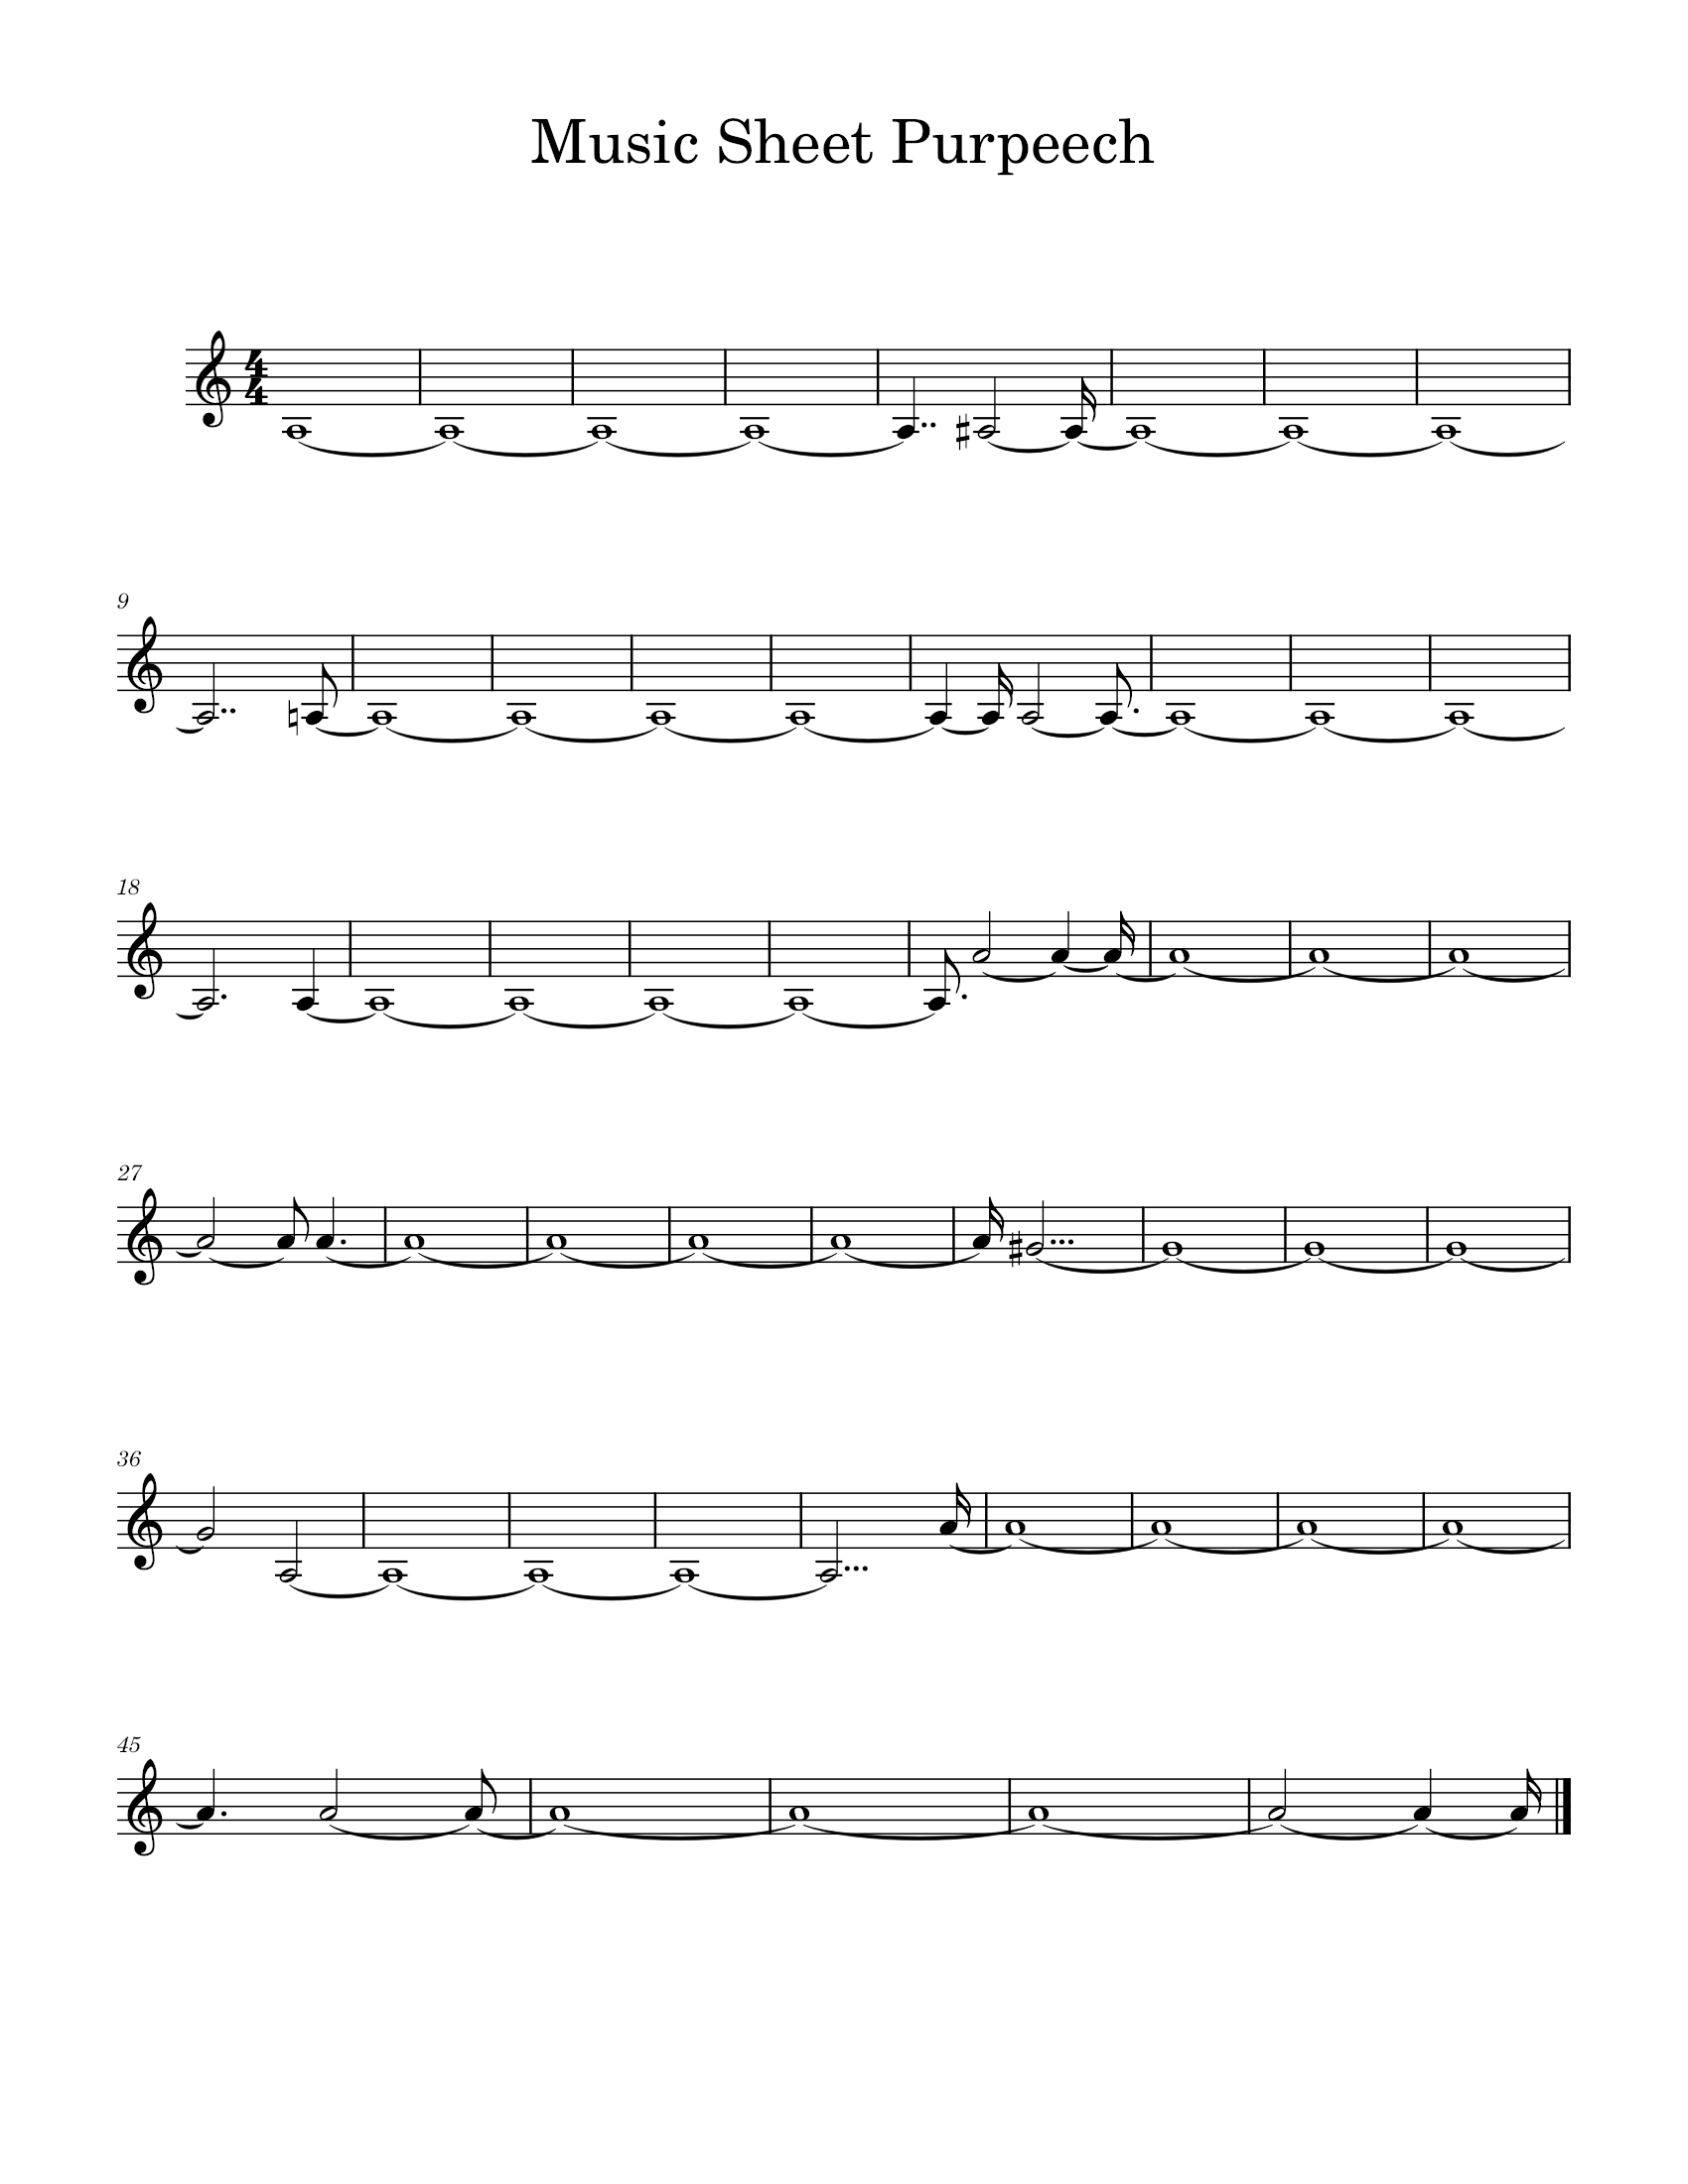

{'onset': 0.0, 'offset': 17.716961451247165, 'note': 'A3'}
{'onset': 17.716961451247165, 'offset': 35.43392290249433, 'note': 'A#3'}
{'onset': 35.43392290249433, 'offset': 53.150884353741496, 'note': 'A3'}
{'onset': 53.150884353741496, 'offset': 70.86784580498866, 'note': 'A3'}
{'onset': 70.86784580498866, 'offset': 88.58480725623583, 'note': 'A3'}
{'onset': 88.58480725623583, 'offset': 106.30176870748299, 'note': 'A4'}
{'onset': 106.30176870748299, 'offset': 124.01873015873016, 'note': 'A4'}
{'onset': 124.01873015873016, 'offset': 141.73569160997732, 'note': 'G#4'}
{'onset': 141.73569160997732, 'offset': 159.45265306122448, 'note': 'A3'}
{'onset': 159.45265306122448, 'offset': 177.16961451247167, 'note': 'A4'}
{'onset': 177.16961451247167, 'offset': 194.88657596371883, 'note': 'A4'}


In [40]:
import os
import librosa
import librosa.display
import numpy as np
import shutil
from music21 import note, stream, metadata, environment

us = environment.UserSettings()
us['musicxmlPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['musescoreDirectPNGPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['lilypondPath'] = r'C://Music2leadsheet//lilypond-2.24.3//bin//lilypond.exe'

# =================================================================
# DEFINES
# Data structure for storing notes
data_structure = []
# Define note frequencies
note_frequencies = {
    "A3": 220.0,
    "A#3": 233.1,
    "B3": 246.9,
    "C4": 261.6,
    "C#4": 277.2,
    "D4": 293.7,
    "D#4": 311.1,
    "E4": 329.6,
    "F4": 349.2,
    "F#4": 370.0,
    "G4": 392.0,
    "G#4": 415.3,
    "A4": 440.0
}
# =================================================================

# =================================================================
# FUNCTIONS
# Function to perform Fourier analysis and find dominant frequency
def get_dom_freq(signal, sr):
    # Calculate FFT
    fft = np.fft.fft(signal)
    # Frequency corresponding to each point in FFT
    freqs = np.fft.fftfreq(len(fft), 1/sr)
    # Find index of maximum amplitude in FFT
    dom_freq_index = np.argmax(np.abs(fft))
    # Get dominant frequency
    dom_freq = freqs[dom_freq_index]
    return dom_freq

# Function to convert note names to music21 Note objects
def create_note(note_name):
    return note.Note(note_name)

# Modify the generate_music_sheet function to use onset and offset
def generate_music_sheet(data_structure, title="Generated Music Sheet"):
    # Create an empty music21 Stream
    music_stream = stream.Stream()

    # Set title for the music sheet
    music_sheet_metadata = metadata.Metadata()
    music_sheet_metadata.title = title
    music_stream.insert(0, music_sheet_metadata)

    for segment in data_structure:
        # Extract onset, offset, and note information
        onset = segment['onset']
        offset = segment['offset']
        note_name = segment['note']

        # Round the duration to the nearest quarter note
        rounded_duration = round((offset - onset) / 0.25) * 0.25

        # Create a Note object based on the note name
        n = create_note(note_name)
        # Set the onset and offset of the note
        n.offset = onset
        n.duration.quarterLength = rounded_duration
        # Add the note to the music stream
        music_stream.append(n)

    return music_stream
# =================================================================

# =================================================================

# config
# filename = input().replace("\\", "/")
sheet_title = "Music Sheet Purpeech"

# Dynamic segment_duration based on onset detection
# file_path = 'C:/Music2leadsheet/separated/htdemucs/{}/vocals.wav'.format(filename.split("/")[-1].split(".")[0])  # Replace with your audio file path
file_path = 'C:/Music2leadsheet/separated/htdemucs/TEST/vocals.wav'
audio_data, sr = librosa.load(file_path, sr=None)
# print(sr)
# Calculate onset strength
onset_env = librosa.onset.onset_strength(y=audio_data, sr=sr)
# Detect onset times
onset_times = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)


# Use the detected onsets to determine segment_duration dynamically
if len(onset_times) >= 1:
    # Calculate the average time difference between onsets
    avg_onset_diff = np.mean(np.diff(onset_times))
    segment_duration = avg_onset_diff
else:
    # Use a default segment_duration if no onsets are detected
    segment_duration = 0.5  # You can set a default value

num_segments = int(len(audio_data) / (segment_duration * sr))

for i in range(num_segments):
    start = int(i * segment_duration * sr)
    end = int((i + 1) * segment_duration * sr)
    onset = start / sr
    offset = end / sr
    segment = audio_data[start:end]

    # Perform Fourier analysis to find dominant frequency
    dominant_freq = get_dom_freq(segment, sr)

    # Find the closest note based on dominant frequency
    closest_note = min(
        note_frequencies, key=lambda x: abs(note_frequencies[x] - dominant_freq))

    # Add data to the data structure
    data_structure.append({"onset": onset,
                           "offset": offset,
                           "note": closest_note})

music_sheet = generate_music_sheet(data_structure, title=sheet_title)
# music_sheet.show("musicxml")
music_sheet.show()

# remove folders
# shutil.rmtree(
#     r"C:/Music2leadsheet/separated/htdemucs/{}".format(filename.split("/")[-1].split(".")[0]))

for i in data_structure:
    print(i)


# Other

In [47]:
import librosa
import numpy as np
from music21 import note, stream, meter, tempo

# ฟังก์ชันสำหรับอ่านไฟล์เสียง
def read_audio(file_path):
    y, sr = librosa.load(file_path)
    return y, sr

# ฟังก์ชันสำหรับคำนวณ Onset และ Offset
def calculate_onset_offset(y, sr):
    onset_frames = librosa.onset.onset_detect(y, sr=sr)
    onset_times = librosa.frames_to_time(onset_frames, sr=sr)

    offset_frames = librosa.onset.onset_detect(y, sr=sr, hop_length=512, backtrack=False)
    offset_times = librosa.frames_to_time(offset_frames, sr=sr)

    return onset_times, offset_times

# ฟังก์ชันสำหรับคำนวณความยาวของโน๊ต
def calculate_note_duration(onset, offset):
    return offset - onset

# ฟังก์ชันสำหรับทำ Fourier analysis และเลือกความถี่สูงที่สุด
def calculate_max_frequency(y, sr, onset, offset):
    start_frame = int(librosa.time_to_frames(onset, sr=sr))
    end_frame = int(librosa.time_to_frames(offset, sr=sr))
    y_segment = y[start_frame:end_frame]

    # Fast Fourier Transform (FFT)
    fft_result = np.fft.fft(y_segment)
    frequencies = np.fft.fftfreq(len(fft_result), d=1/sr)

    # เลือกความถี่ที่สูงที่สุด
    max_frequency_index = np.argmax(np.abs(fft_result))
    max_frequency = np.abs(frequencies[max_frequency_index])

    return max_frequency

# ฟังก์ชันสำหรับแปลงความถี่เป็นโน๊ต
def frequency_to_note(frequency):
    note_frequencies = {
        "A3": 220.0,
        "A#3": 233.1,
        "B3": 246.9,
        "C4": 261.6,
        "C#4": 277.2,
        "D4": 293.7,
        "D#4": 311.1,
        "E4": 329.6,
        "F4": 349.2,
        "F#4": 370.0,
        "G4": 392.0,
        "G#4": 415.3,
        "A4": 440.0
    }

    closest_note = min(note_frequencies, key=lambda x: abs(note_frequencies[x] - frequency))
    return closest_note

# ฟังก์ชันสำหรับสร้าง Music21 Stream จากข้อมูล
def create_music21_stream(data_structure):
    music_stream = stream.Score()
    part = stream.Part()

    for item in data_structure:
        if item["Duration"] > 0:
            n = note.Note(item["Note"])
            n.duration = meter.Duration(item["Duration"])
            part.append(n)

    music_stream.append(part)
    music_stream.insert(0, tempo.MetronomeMark(number=120))

    return music_stream

# ตัวอย่างการใช้งาน
file_path = r"C:\Music2leadsheet\separated\htdemucs\TEST\vocals.wav"
y, sr = read_audio(file_path)

onset_times, offset_times = calculate_onset_offset(y, sr)

data_structure = []

for i in range(len(onset_times)):
    onset = onset_times[i]
    offset = offset_times[i]
    duration = calculate_note_duration(onset, offset)
    max_frequency = calculate_max_frequency(y, sr, onset, offset)
    note_name = frequency_to_note(max_frequency)

    data_structure.append({
        "Duration": duration,
        "Note": note_name
    })

music21_stream = create_music21_stream(data_structure)
music21_stream.show()


TypeError: onset_detect() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given